In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from nemo import evaluate_nemo
import util
from topology import get_lognorm_hist
import topology
from util import evaluate
import pandas as pd
from nemo import NemoSolver

#### Topology Setup

In [2]:
seed = 4
np.random.seed(seed)

device_number = 1000
avg = 50
c_capacity = 50
max_resources = device_number * avg - c_capacity

X_dim_range = [0, 100]
Y_dim_range = [-50, 50]
centers = 40

H, bins = get_lognorm_hist()
coords_df = topology.coords_sim(device_number, centers, X_dim_range, Y_dim_range, seed)
coord_dict = {"sim(1000)": coords_df}

df_dict_topologies = topology.create_topologies_from_dict(coord_dict, H, max_resources, c_capacity,
                                                          weights=(1, avg * 2), dist="lognorm", with_clustering=True,
                                                          kmin=10, kmax=30, kseed=10)

Creating df for sim(1000)
Optimal k is 20
Done


In [3]:
coord_list = []
coord_list.append(coords_df)

for i in range(0, 10):
    coords_df = topology.coords_sim(device_number, centers, X_dim_range, Y_dim_range, with_latency=True)
    coord_list.append(coords_df)

len(coord_list)

11

In [4]:
t_label = "sim(1000)"
prim_df, c_coords, base_col, slot_columns, centroids, opt_k, sil = df_dict_topologies[t_label]

eval_matrix = {}
prim_df

,x,y,latency,type,base,weight,capacity_100,capacity_90,capacity_80,capacity_70,capacity_60,capacity_50,capacity_40,capacity_30,capacity_20,capacity_10,capacity_5,capacity_1,cluster
0,71.925332,25.565323,0.000000,coordinator,9223372036854775807,0,50,50,50,50,50,50,50,50,50,50,50,50,-1
1,24.775013,11.958341,49.074459,worker,9223372036854775807,1,50,48,49,44,42,54,40,34,34,73,27,77,1
2,5.770977,8.497964,68.320520,worker,9223372036854775807,1,50,53,48,42,44,59,52,57,42,34,11,27,1
3,30.952786,-3.329505,50.136420,worker,9223372036854775807,1,50,49,54,44,47,43,37,58,28,38,27,8,15
4,18.231240,4.925715,57.524334,worker,9223372036854775807,27,50,49,55,44,48,58,51,35,33,17,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,88.052679,11.635696,21.310228,worker,9223372036854775807,1,50,48,51,52,58,62,75,47,59,17,38,39,9
997,34.643330,-22.089226,60.505403,worker,9223372036854775807,1,50,52,50,47,50,48,40,48,28,27,30,119,13
998,20.830278,17.439655,51.737134,worker,9223372036854775807,1,50,49,47,57,53,57,66,38,26,99,94,154,1
999,36.871673,9.978153,38.362988,worker,9223372036854775807,12,50,50,49,53,40,54,33,38,44,79,59,4,15


In [5]:
print("Required:", prim_df["weight"].sum(), "Available:", prim_df["capacity_100"].sum())
colors, light_colors, palette = util.get_color_list(opt_k)
palette

Required: 5971 Available: 50050


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

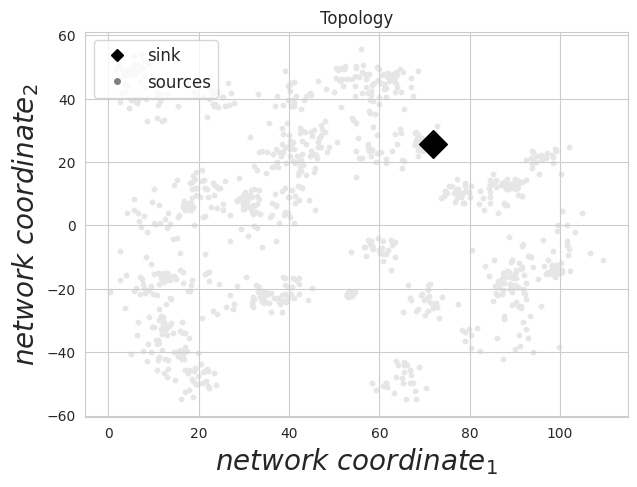

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))
ax1 = util.plot_topology(ax1, prim_df, scale_fac=0.1)

X_dim = ax1.get_xlim()
Y_dim = ax1.get_ylim()

# plt.savefig("plots/sim_1000/sim_" + str(device_number - 1) + "_ncs.svg", bbox_inches="tight")

plt.show()

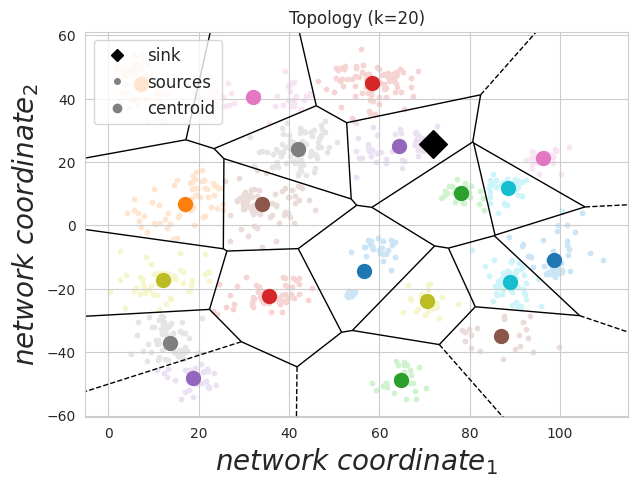

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

ax1 = util.plot_topology(ax1, prim_df, colors=colors, title='Topology (k=' + str(opt_k) + ")", scale_fac=0.1,
                         plot_voronoi=True, plot_centroid=True)

ax1.set_xlim(X_dim)
ax1.set_ylim(Y_dim)

# plt.savefig("plots/sim_1000/sim_" + str(device_number - 1) + "_ncs_grouped.svg", bbox_inches="tight")

plt.show()

## Changing Topology

In [8]:
param_dict = {
    "weight_1": {"merge_factor": 0.1, "step_size": 0.3},
    "weight_2": {"merge_factor": 0.9, "step_size": 0.2},
    "weight": {"merge_factor": 0.4, "step_size": 0.4},
}

In [9]:
# for the plots and vanilla NEMO
eval_name = "nemo_dc"
slot_col = "capacity_100"
weight_col = "weight"

df_dict, opt_dict, limits_dict = evaluate_nemo(prim_df, [slot_col], weight_col,
                                               merge_factor=param_dict[weight_col][
                                                   "merge_factor"],
                                               step_size=param_dict[weight_col]["step_size"],
                                               with_eval=False)
placement_df = df_dict[slot_col]

Starting nemo for: c=capacity_100, w=weight, l=20, step_size=0.4, merge_factor=0.4
Level 0 CH number:  1000
--------Balancing load for 20 clusters to 0
Clusters processed: 0
Clusters processed: 10
Level 1 CH number:  129
--------Balancing load for 8 clusters to 0
Clusters processed: 0
Level 2 CH number:  21
--------Balancing load for 3 clusters to 0
Clusters processed: 0
Level 3 CH number:  8


In [10]:
placement_df

,oindex,x,y,type,cluster,total_weight,used_weight,total_capacity,free_capacity,level,parent
0,0,71.925332,25.565323,coordinator,-1,<NA>,<NA>,50,38,4,<NA>
1,1,24.775013,11.958341,worker,1,1,1,50,50,0,113
2,2,5.770977,8.497964,worker,1,1,1,50,50,0,896
3,3,30.952786,-3.329505,worker,15,1,1,50,50,0,959
4,4,18.231240,4.925715,worker,1,27,7,50,50,0,757
...,...,...,...,...,...,...,...,...,...,...,...
1090,996,88.052679,11.635696,worker,9,1,1,50,50,0,652
1091,997,34.643330,-22.089226,worker,13,1,1,50,50,0,64
1092,998,20.830278,17.439655,worker,1,1,1,50,50,0,339
1093,999,36.871673,9.978153,worker,15,12,12,50,50,0,276


In [11]:
evaluations = []
for coords_df in coord_list:
    update_df = coords_df[["x", "y"]]
    # Update DataFrame based on values in another DataFrame
    df = placement_df.merge(update_df, left_on='oindex', right_index=True, suffixes=('_orig', '_update'), how='left')

    # Choose values from the updated columns, fill NaN with the original values
    df['x'] = df['x_update'].fillna(df['x_orig'])
    df['y'] = df['y_update'].fillna(df['y_orig'])

    # Drop the intermediate columns
    df = df.drop(columns=['x_orig', 'y_orig', 'x_update', 'y_update'])

    edf = evaluate(df)
    evaluations.append(edf)

In [12]:
evaluations[0]

,latency_distribution,received_packets
0,0.000000,12.0
144,3.551051,50.0
666,14.863497,49.0
178,10.277476,12.0
344,9.096288,50.0
...,...,...
366,9.082338,0.0
367,49.267909,0.0
369,92.951325,0.0
370,48.790635,0.0


## Evaluation

#### Latency

In [13]:
eval_colors = {
    "dt": colors[0],
    "leach": colors[1],
    "mst": colors[2],
    "chain": colors[3],
    "nemo": colors[4],
    "nemo_base": colors[4],
    "nemo_dc_base": colors[4],
    "NEMO_base": colors[4],
    "nemo_rc": colors[5],
    "nemo_rc_base": colors[5],
    "nemo (rdm groups)_base": colors[5],
    "nemo_dc": colors[6],
    "NEMO+redistribution": colors[6],
    "nemo_pen": colors[7],
    "nemo_pen_base": colors[8],
    "nemo_dc_weight_2": colors[9],
    "nemo_dc_weight": colors[10]
}

renaming_dict = {
    "nemo_dc": "nemo (w=1,",
    "nemo_dc_weight_2": "nemo (w=2,",
    "nemo_dc_weight": "nemo (w=ln[1, 50],",
}


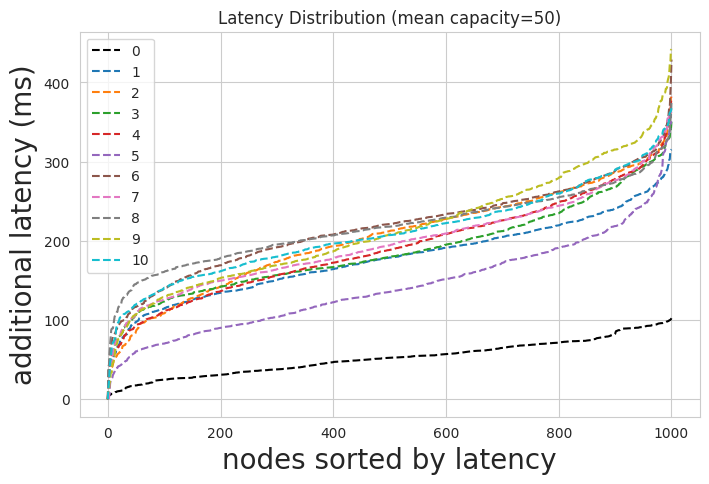

Means:  {'0': 52.15, '1': 177.5, '2': 203.87, '3': 188.02, '4': 191.81, '5': 142.02, '6': 217.21, '7': 197.19, '8': 217.47, '9': 214.3, '10': 210.51}
Quantiles:  {'0': 82.4, '1': 240.58, '2': 286.54, '3': 268.09, '4': 278.26, '5': 218.61, '6': 288.4, '7': 276.58, '8': 274.13, '9': 315.3, '10': 289.95}


In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharey="all")
quant_dict = {}
mean_dict = {}

for i, df in enumerate(evaluations):
    l = str(i)
    sv = df["latency_distribution"].sort_values()

    quant_dict[l] = round(sv.quantile(0.9), 2)
    mean_dict[l] = round(sv.mean(), 2)
    if i == 0:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--", color="black")
    else:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--")

ax1.set_xlabel('nodes sorted by latency')
ax1.set_ylabel('additional latency (ms)')

ax1.legend(loc="upper left", prop={'size': 10})
# Display a figure.
# plt.ylim([0, 100])

ax1.yaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)

# plt.savefig("plots/sim_1000/eval_latency.svg")

ax1.set_title('Latency Distribution (mean capacity=' + str(avg) + ")")
plt.show()
print("Means: ", mean_dict)
print("Quantiles: ", quant_dict)

## Test Reoptimization

In [15]:
i = 0
max_i = 1
ndf = prim_df.copy()
ndf["x"] = coord_list[i]["x"]
ndf["y"] = coord_list[i]["y"]

nemo = NemoSolver(ndf, slot_col, weight_col, max_levels=50, step_size=param_dict[weight_col]["step_size"],
                  merge_factor=param_dict[weight_col]["merge_factor"])
df, opts, limits = nemo.nemo_full()

edf = util.evaluate(df)
evaluations[i] = edf
edf

Level 0 CH number:  1000
--------Balancing load for 20 clusters to 0
Clusters processed: 0
Clusters processed: 10
Level 1 CH number:  129
--------Balancing load for 8 clusters to 0
Clusters processed: 0
Level 2 CH number:  21
--------Balancing load for 3 clusters to 0
Clusters processed: 0
Level 3 CH number:  8


,latency_distribution,received_packets
0,0.000000,12.0
144,3.551051,50.0
666,14.863497,49.0
178,10.277476,12.0
344,9.096288,50.0
...,...,...
366,9.082338,0.0
367,49.267909,0.0
369,92.951325,0.0
370,48.790635,0.0


In [16]:
df

,oindex,x,y,type,cluster,total_weight,used_weight,total_capacity,free_capacity,level,parent,load
0,0,71.925332,25.565323,coordinator,-1,<NA>,<NA>,50,38,4,<NA>,12
1,1,24.775013,11.958341,worker,1,1,1,50,50,0,113,0
2,2,5.770977,8.497964,worker,1,1,1,50,50,0,896,0
3,3,30.952786,-3.329505,worker,15,1,1,50,50,0,959,0
4,4,18.231240,4.925715,worker,1,27,7,50,50,0,757,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,996,88.052679,11.635696,worker,9,1,1,50,50,0,652,0
1091,997,34.643330,-22.089226,worker,13,1,1,50,50,0,64,0
1092,998,20.830278,17.439655,worker,1,1,1,50,50,0,339,0
1093,999,36.871673,9.978153,worker,15,12,12,50,50,0,276,0


In [23]:
i = 1
number_rnodes = int(0.1 * prim_df.shape[0])
rnodes = evaluations[i]["latency_distribution"].sort_values().index[-number_rnodes:].to_numpy()

for node in rnodes:
    df_re, new_cluster_heads, resource_limit, level = nemo.remove_node(node)

In [24]:
df_re

,oindex,x,y,type,cluster,total_weight,used_weight,total_capacity,free_capacity,level,parent,load
0,0,71.925332,25.565323,coordinator,-1,<NA>,<NA>,50,38,4,<NA>,12
1,1,24.775013,11.958341,worker,1,1,1,50,50,0,113,0
2,2,5.770977,8.497964,worker,1,1,1,50,50,0,896,0
3,3,30.952786,-3.329505,worker,15,1,1,50,50,0,959,0
4,4,18.231240,4.925715,worker,1,27,7,50,50,0,757,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,996,88.052679,11.635696,worker,9,1,1,50,50,0,652,0
1091,997,34.643330,-22.089226,worker,13,1,1,50,50,0,64,0
1092,998,20.830278,17.439655,worker,1,1,1,50,50,0,339,0
1093,999,36.871673,9.978153,worker,15,12,12,50,50,0,276,0


In [26]:
# evaluate new df
ndl = coord_list[i].drop(rnodes)
edf = evaluate(df_re)
evaluations[i] = edf
edf

,latency_distribution,received_packets
0,0.000000,12.0
519,5.398177,49.0
123,8.050372,50.0
144,3.551051,50.0
178,10.277476,12.0
...,...,...
375,56.856069,0.0
376,30.264135,0.0
377,96.439228,0.0
378,48.798223,0.0


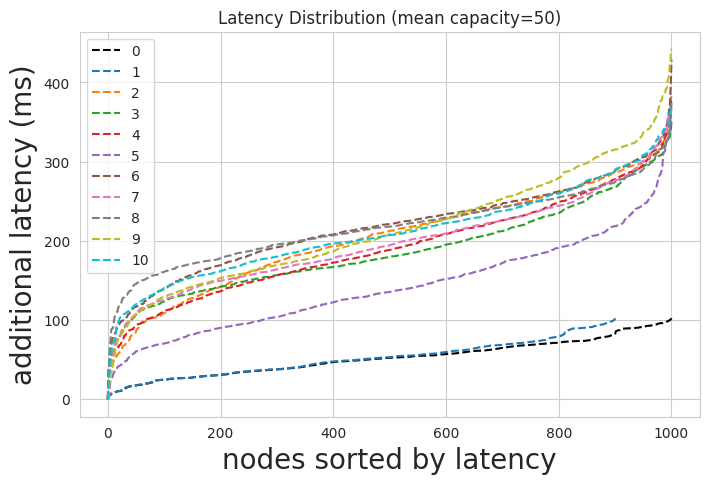

Means:  {'0': 52.15, '1': 50.72, '2': 203.87, '3': 188.02, '4': 191.81, '5': 142.02, '6': 217.21, '7': 197.19, '8': 217.47, '9': 214.3, '10': 210.51}
Quantiles:  {'0': 82.4, '1': 82.4, '2': 286.54, '3': 268.09, '4': 278.26, '5': 218.61, '6': 288.4, '7': 276.58, '8': 274.13, '9': 315.3, '10': 289.95}


In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharey="all")
quant_dict = {}
mean_dict = {}

for i, df in enumerate(evaluations):
    l = str(i)
    sv = df["latency_distribution"].sort_values()

    quant_dict[l] = round(sv.quantile(0.9), 2)
    mean_dict[l] = round(sv.mean(), 2)
    if i == 0:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--", color="black")
    else:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--")

ax1.set_xlabel('nodes sorted by latency')
ax1.set_ylabel('additional latency (ms)')

ax1.legend(loc="upper left", prop={'size': 10})
# Display a figure.
# plt.ylim([0, 100])

ax1.yaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)

# plt.savefig("plots/sim_1000/eval_latency.svg")

ax1.set_title('Latency Distribution (mean capacity=' + str(avg) + ")")
plt.show()
print("Means: ", mean_dict)
print("Quantiles: ", quant_dict)

In [ ]:
# TODO add insertion of nodes, check scalability test with different weights